# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [75]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
# Import your libraries:
import pandas as pd
from sklearn.datasets import load_diabetes

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [77]:
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [78]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [79]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

What are the variables in this dataset according to the description? List them in the markdown cell below

- age --> age in years
- sex
- bmi --> body mass index
- bp --> average blood pressure
- s1 --> tc --> total serum cholesterol
- s2 --> ldl --> low-density lipoproteins
- s3 --> hdl --> high-density lipoproteins
- s4 --> tch --> total cholesterol / HDL
- s5 --> ltg --> possibly log of serum triglycerids
- s6 --> glu --> blood sugar level

#### Enter your answer here:

age, sex, body mass index, average blood pressure, s1, s2, s3, s4, s5, s6




Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [80]:
diabetes_data = diabetes.data

diabetes_data.shape

(442, 10)

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Initialize the model in the variable `diabetes_model`

In [82]:
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42 )

# The number 42 in random_state is arbitrary — but it’s become a bit of an inside joke and common convention in data science, 
# referencing “The Hitchhiker's Guide to the Galaxy”, where 42 is the “Answer to the Ultimate Question of Life, 
# the Universe, and Everything.” 

diabetes_model = LinearRegression()

In the cell below, fit the model and print the intercept and coefficients of the model. 

151.55985324550707 [  48.99562671 -259.21326295  546.14846067  334.84507667 -941.28444386
  523.00153953  188.08452057  288.09631074  734.4876986    65.97920873]


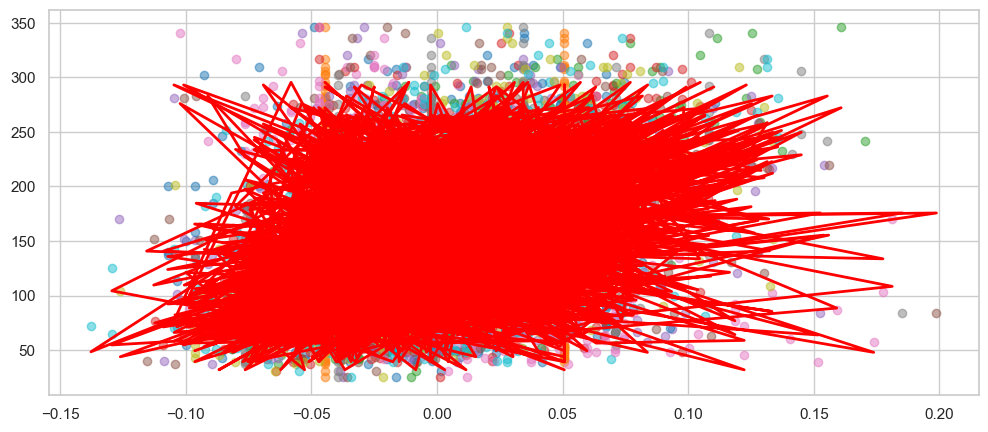

In [83]:
diabetes_model.fit(X_train, y_train)

print(diabetes_model.intercept_, diabetes_model.coef_)

y_train_pred = diabetes_model.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")

# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Result should look like this:

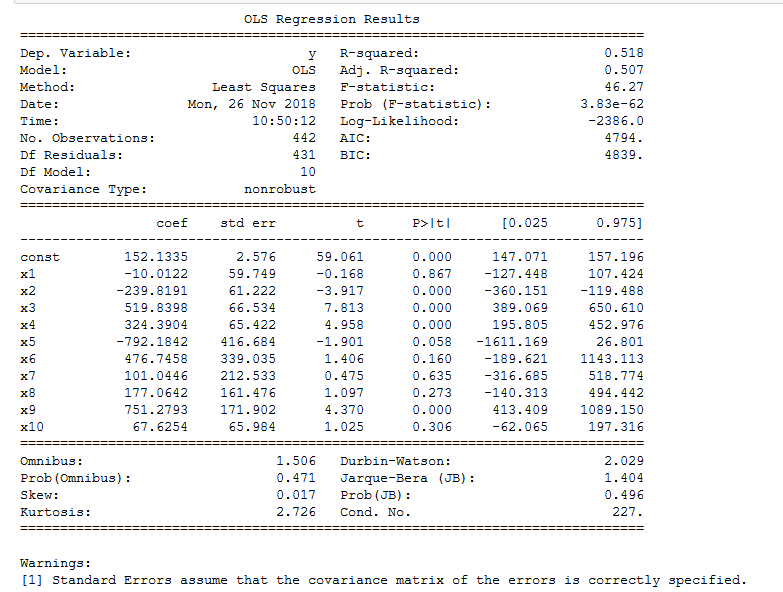

In [84]:
!pip install statsmodels

import statsmodels.api as sm
from sklearn.datasets import load_diabetes

# Load the dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Add constant for the intercept
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 12 May 2025   Prob (F-statistic):           3.83e-62
Time:                        16:28:44   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [85]:
from pandas import read_csv
import pandas as pd

auto = read_csv(r'C:\Users\jefit\OneDrive\Escritorio\Ironhack\Ironhack candela\Week 2\Labs\lab-intro-to-sklearn-en\auto-mpg.csv', delimiter=",")

Look at the first 5 rows using the `head()` function:

In [86]:
auto.head()
auto.tail()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
393,27.0,4,140.0,86.0,2790,15.6,82,"\t""ford mustang gl"""
394,44.0,4,97.0,52.0,2130,24.6,82,"\t""vw pickup"""
395,32.0,4,135.0,84.0,2295,11.6,82,"\t""dodge rampage"""
396,28.0,4,120.0,79.0,2625,18.6,82,"\t""ford ranger"""
397,31.0,4,119.0,82.0,2720,19.4,82,"\t""chevy s-10"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [87]:
object_cols = auto.select_dtypes(include='object').columns

print(auto.dtypes)

#all data types look correct

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object


What is the newest model year and the oldest model year?

In [88]:
oldest = auto['model_year'].min()

newest = auto['model_year'].max()

print("The oldest model year is", oldest)

print("The newest model yeat is", newest)

The oldest model year is 70
The newest model yeat is 82


Check the dataset for missing values and remove all rows containing at least one missing value.

In [89]:
auto.isnull().sum

auto.shape

(398, 8)

In [90]:
auto.dropna(axis=0, how="any", inplace=True)

auto.shape

print("6 rows have been removed due to missing values.")

6 rows have been removed due to missing values.


Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [91]:
cylinders_freq_table = auto['cylinders'].value_counts()

print(cylinders_freq_table)

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64


We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [96]:
#first we drop the car_name column:

auto = auto.drop(columns='car_name')

#separate the dataframe to predictor and response variables:

X = auto.drop(columns=['mpg'])
y = auto['mpg']

#Separate those into test and training data with 80% of the data in the training set and the remainder in the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 )

Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [97]:
auto_model = LinearRegression()


Next, fit the model in the cell below.

In [98]:
auto_model.fit(X_train, y_train)

LinearRegression()

# Challenge 4 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [99]:
# First, we calculate the y_pred_train, using the X values reserved for training the model.

y_train_pred = auto_model.predict(X_train)

# Once we have calculated y_pred_train, we compare those values with the ones we originally assigend to y_train. 

from sklearn.metrics import r2_score

r_squared_train = r2_score(y_train, y_train_pred)

print("R-squared for trained data (from scikit-learn):", r_squared_train)

R-squared for trained data (from scikit-learn): 0.8107227953093896


#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_train` data and the predicted `y_test_pred`.

In [100]:
# First, we calculate the y_test_pred, using the X values reserved for testing the model.

y_test_pred = auto_model.predict(X_test)

# Once we have calculated y_pred_train, we compare those values with the ones we originally assigend to y_train. 

from sklearn.metrics import r2_score

r_squared_test = r2_score(y_test, y_test_pred)

print("R-squared for test data (from scikit-learn):", r_squared_test)

R-squared for test data (from scikit-learn): 0.7942349075428591


# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [101]:
#Separate those into test and training data with 90% of the data in the training set and the remainder in the test set.

X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, test_size = 0.1, random_state=42 )

Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [102]:
auto_model09 = LinearRegression()

auto_model09.fit(X_train09, y_train09)

LinearRegression()

Compute the predicted values and r squared score for our new model and new sample data.

In [103]:
y_train_pred_model09 = auto_model09.predict(X_train09)

from sklearn.metrics import r2_score

r_squared_train_model09 = r2_score(y_train09, y_train_pred_model09)

print("R-squared for train data:", r_squared_train_model09)

R-squared for train data: 0.8047940166959004


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [ ]:
y_test_pred_model09 = auto_model09.predict(X_test09)

r_squared_test_model09 = r2_score(y_test09, y_test_pred_model09)

print("R-squared for test data:", r_squared_test_model09)


# After decreasing the test sample size to 10%, there has been an improvement in the test r squared:
#    - with 80/20 proportion, the r squared for test data was 0.794
#    - with 90/10 proportion, the r squared for test data has resulted in 0.847, showing an improvement.

R-squared for train data: 0.8468911998183242


# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [105]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [106]:
rfe = RFE(estimator=auto_model, n_features_to_select=3)

Fit the model and print the ranking

In [110]:
rfe.fit(X, y)

print(pd.Series(rfe.ranking_, index=X.columns).sort_values())



cylinders       1
acceleration    1
model_year      1
displacement    2
weight          3
horse_power     4
dtype: int64


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [111]:
selected_features = X.columns[rfe.support_]

print("Selected features:", selected_features.tolist())


#Subset the dataset to the 3 most important features (selected ones):

X_selected= X[selected_features]

#Perform the train test split:

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_selected, y, test_size = 0.2, random_state=42 )



Selected features: ['cylinders', 'acceleration', 'model_year']


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [113]:
# Fit a new model with the subset:

auto_model_reduced = LinearRegression()

auto_model_reduced.fit(X_selected, y)

# Calculate y_pred and r squared for train data:

y_train_pred_reduced = auto_model_reduced.predict(X_train_reduced)

r_squared_train_reduced = r2_score(y_train_reduced, y_train_pred_reduced)

print("R-squared for train reduced data:", r_squared_train_reduced)


# Calculate y_pred and r squared for test data:

y_test_pred_reduced = model_3selected_features.predict(X_test_reduced)

r_squared_test_reduced = r2_score(y_test_reduced, y_test_pred_reduced)

print("R-squared for test reduced data:", r_squared_test_reduced)


R-squared for train reduced data: 0.7142717742705633
R-squared for test reduced data: 0.7172318875479551


In [114]:
# The r squared score did not improve (0.714 and 0.717 < 0.811 and 0.794), which is expected. 
# A lower r-aquared value suggests that the independent variables in the regression model are 
# not effectively explaining the variation in the dependent variable. 
# This could be due to factors such as missing relevant variables, non-linear relationships, 
# or inherent variability in the data that cannot be captured by the model.

# In this case, as we've dropped some variables and stayed onmly with the top 3, the r squared value is expected to be lower, 
# as we are ommitting some variables that may have an impact on the dependent variable (y). 